# Importing Libraries and Data

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set global font to 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'

# Load the Excel file
file_path = 'Exogenus - Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Descriptive Analysis

In [3]:
# Descriptive Analysis
summary_statistics = data.describe()
print("Descriptive Statistics:")
print(summary_statistics)

Descriptive Statistics:
                    Observation Date  Interest Rates  Personal Income  \
count                            799      799.000000       799.000000   
mean   1992-03-31 23:43:46.783479296        5.756771      7517.214518   
min              1959-01-01 00:00:00        0.620000       391.800000   
25%              1975-08-16 12:00:00        3.880000      1393.600000   
50%              1992-04-01 00:00:00        5.210000      5357.400000   
75%              2008-11-16 00:00:00        7.460000     12185.450000   
max              2025-07-01 00:00:00       15.320000     26200.200000   
std                              NaN        2.902971      6897.432968   

       Producer Price Index  Consumer Price Index  Industrial Production  \
count            799.000000            799.000000             799.000000   
mean             120.122121            140.486603              67.953518   
min               31.300000             28.970000              21.999800   
25%           

# Pearson Correlation Analysis


Pearson Correlation Matrix:
                        Observation Date  Interest Rates  Personal Income  \
Observation Date                1.000000       -0.469015         0.946368   
Interest Rates                 -0.469015        1.000000        -0.588813   
Personal Income                 0.946368       -0.588813         1.000000   
Producer Price Index            0.979402       -0.449114         0.961332   
Consumer Price Index            0.991064       -0.506217         0.970405   
Industrial Production           0.976254       -0.481890         0.892609   
Personal Saving                 0.677250       -0.437844         0.738467   
Gross Domestic Product          0.950536       -0.583716         0.998706   
Unemployment Rate              -0.046115        0.289419        -0.157988   

                        Producer Price Index  Consumer Price Index  \
Observation Date                    0.979402              0.991064   
Interest Rates                     -0.449114             -0.

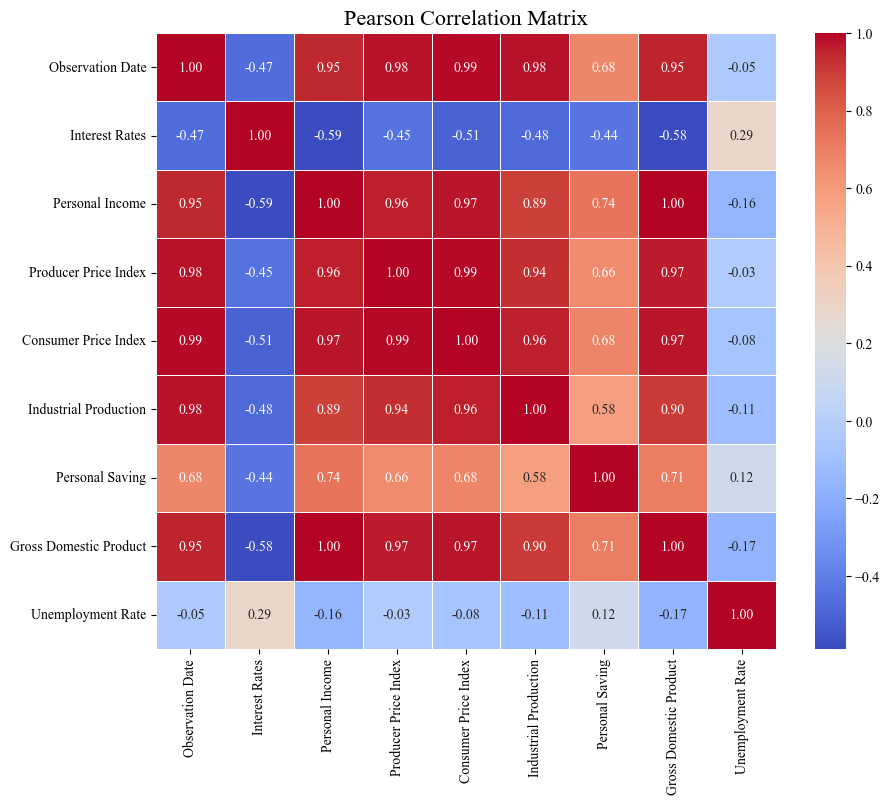

In [4]:
# Pearson Correlation Analysis
correlation_matrix = data.corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)

# Set the title for the heatmap
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()

# Regression Analysis

In [5]:
# Define the independent variables and dependent variable
X = data[['Interest Rates', 'Personal Income', 'Producer Price Index', 'Consumer Price Index', 
          'Industrial Production', 'Personal Saving', 'Gross Domestic Product']]
y = data['Unemployment Rate']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
regression_summary = model.summary()

# Print regression results
print("\nRegression Summary:")
print(regression_summary)


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     148.9
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          9.69e-140
Time:                        20:57:38   Log-Likelihood:                -1214.7
No. Observations:                 799   AIC:                             2445.
Df Residuals:                     791   BIC:                             2483.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const  

# Plotting Variables

C:\Users\nafem\AppData\Local\Temp\ipykernel_9188\1646330413.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


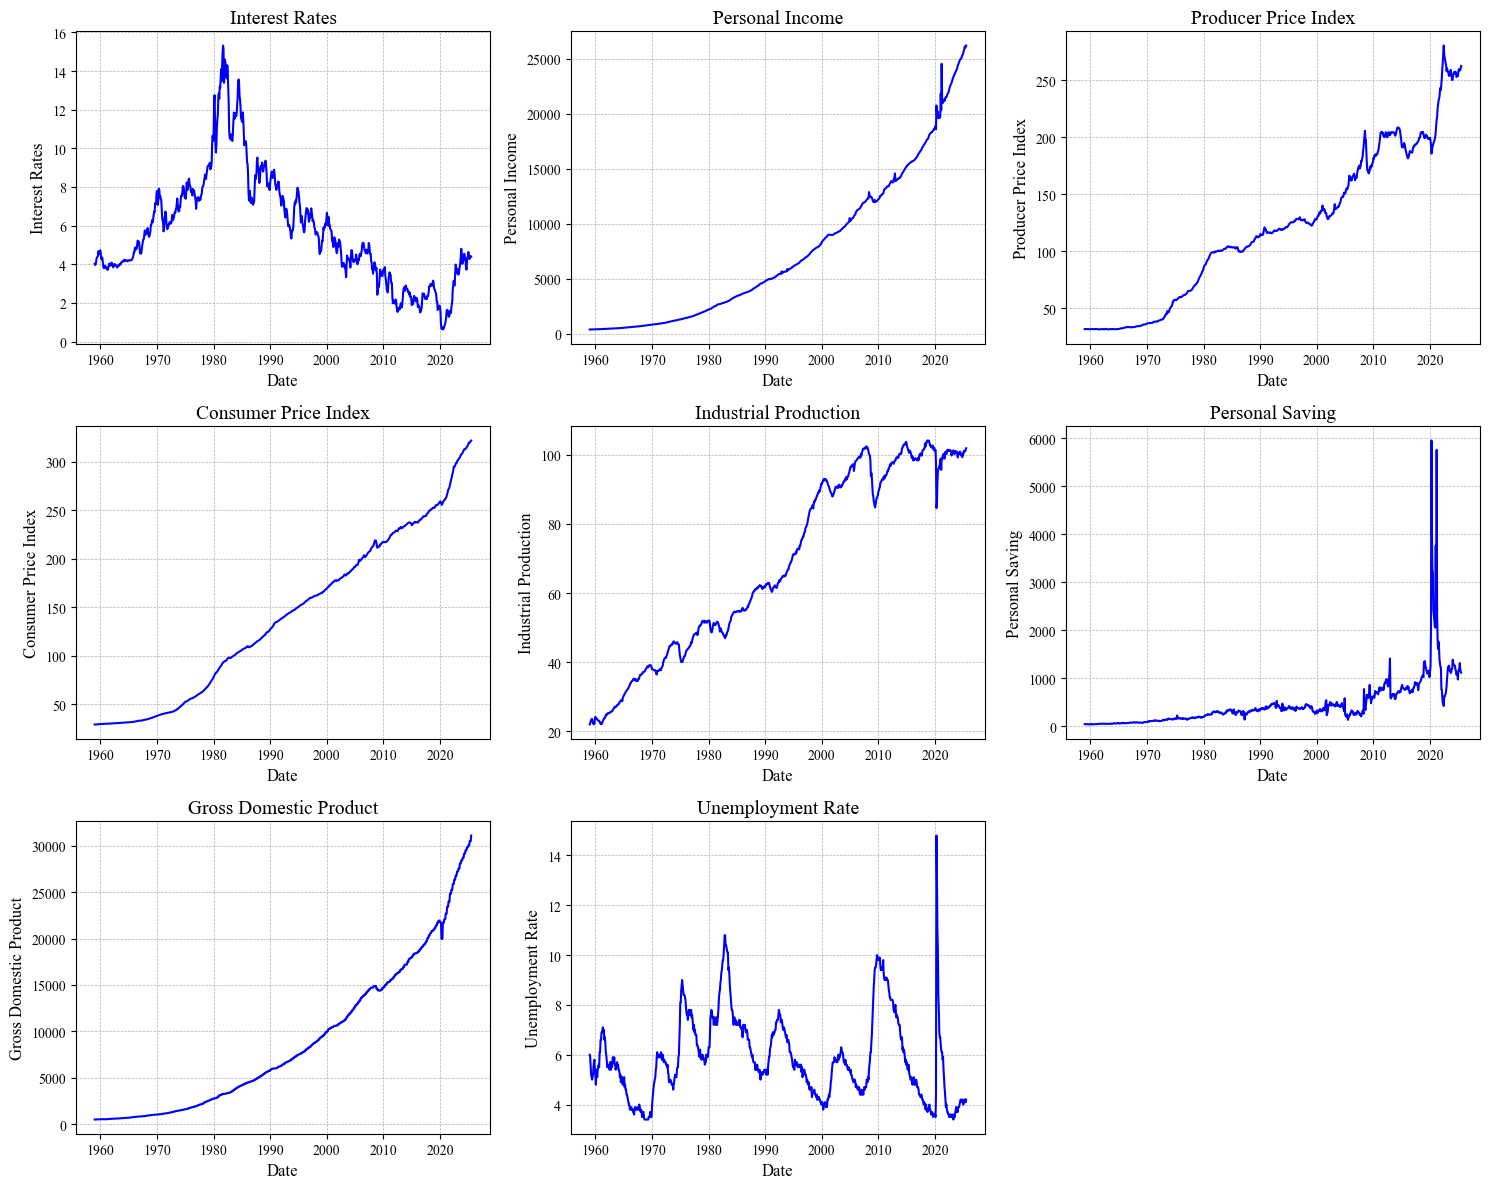

In [6]:
import matplotlib.pyplot as plt

# Ensure the Observation Date is aligned with the data after differencing
observation_dates = data['Observation Date'].iloc[1:]  # Skip the first row after differencing

# List of variables to plot
variables = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 'Consumer Price Index',
    'Industrial Production', 'Personal Saving', 'Gross Domestic Product', 'Unemployment Rate'
]

plt.figure(figsize=(15, 12))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.plot(data['Observation Date'], data[variable], label=variable, color='b')
    plt.title(variable, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    
    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Rotate x-axis labels to keep them straight
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()

# Show the updated plots
plt.show()

# Stochastic Properties and Pre-testing

## ACF, PACF, and ADF Test

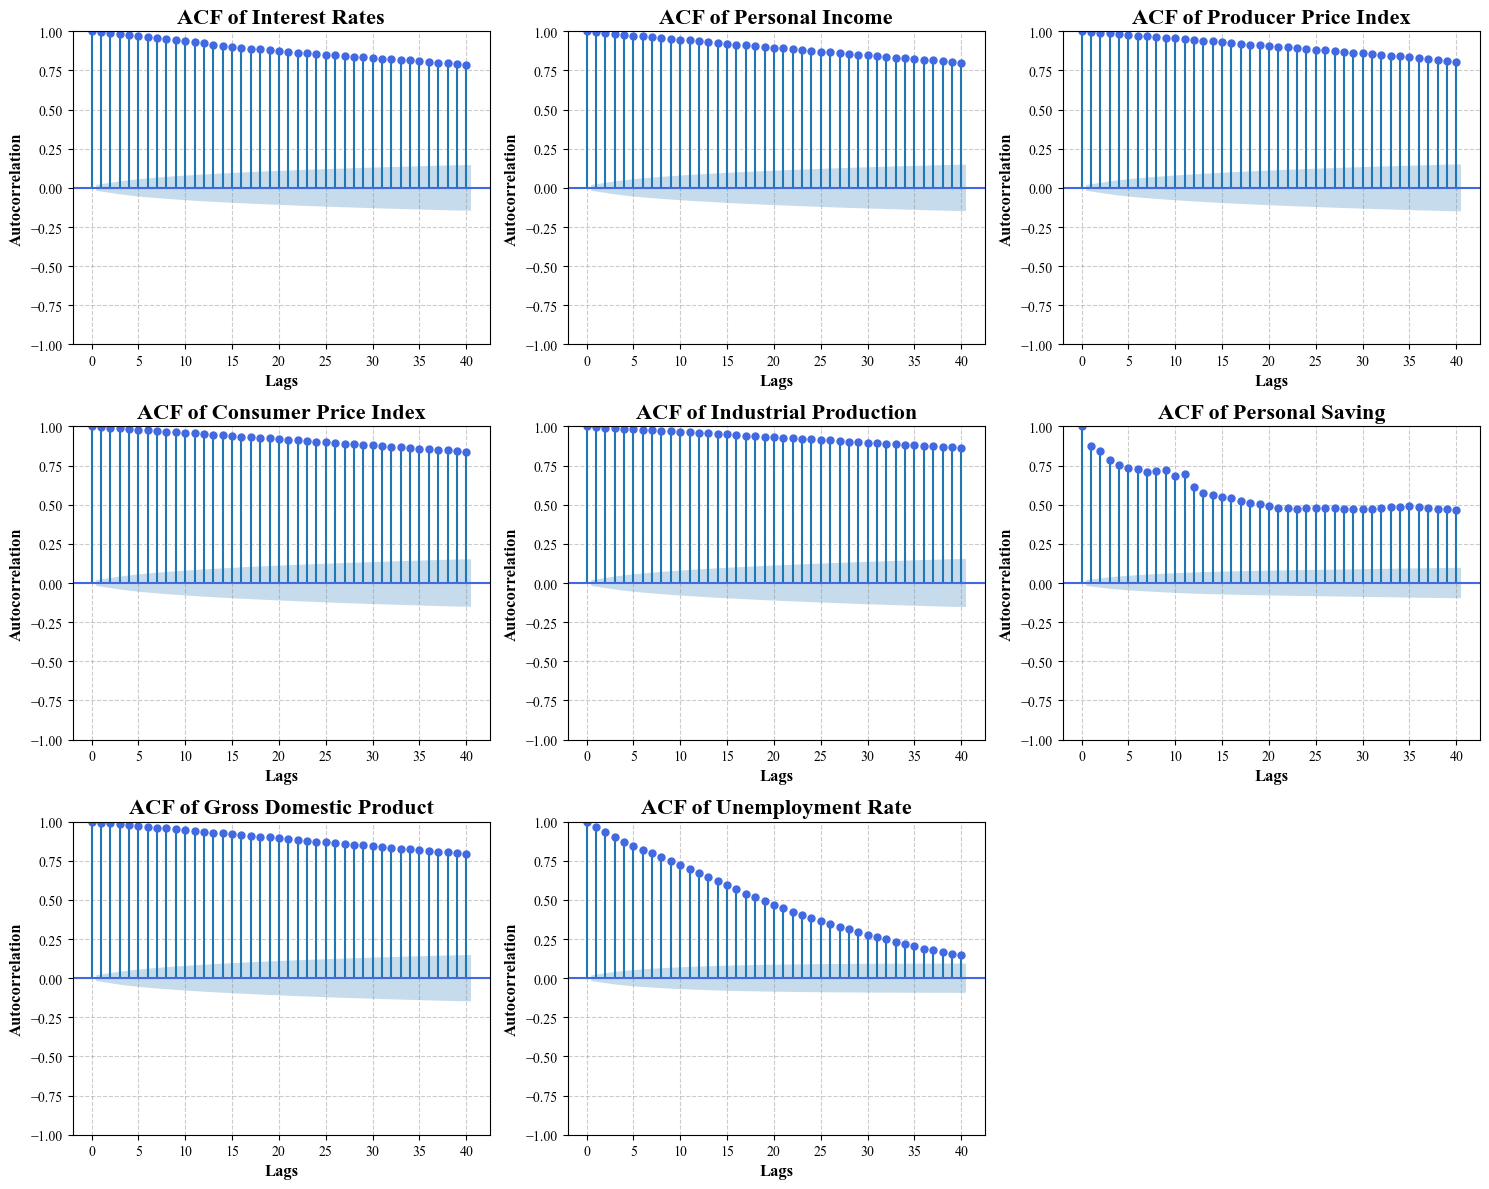

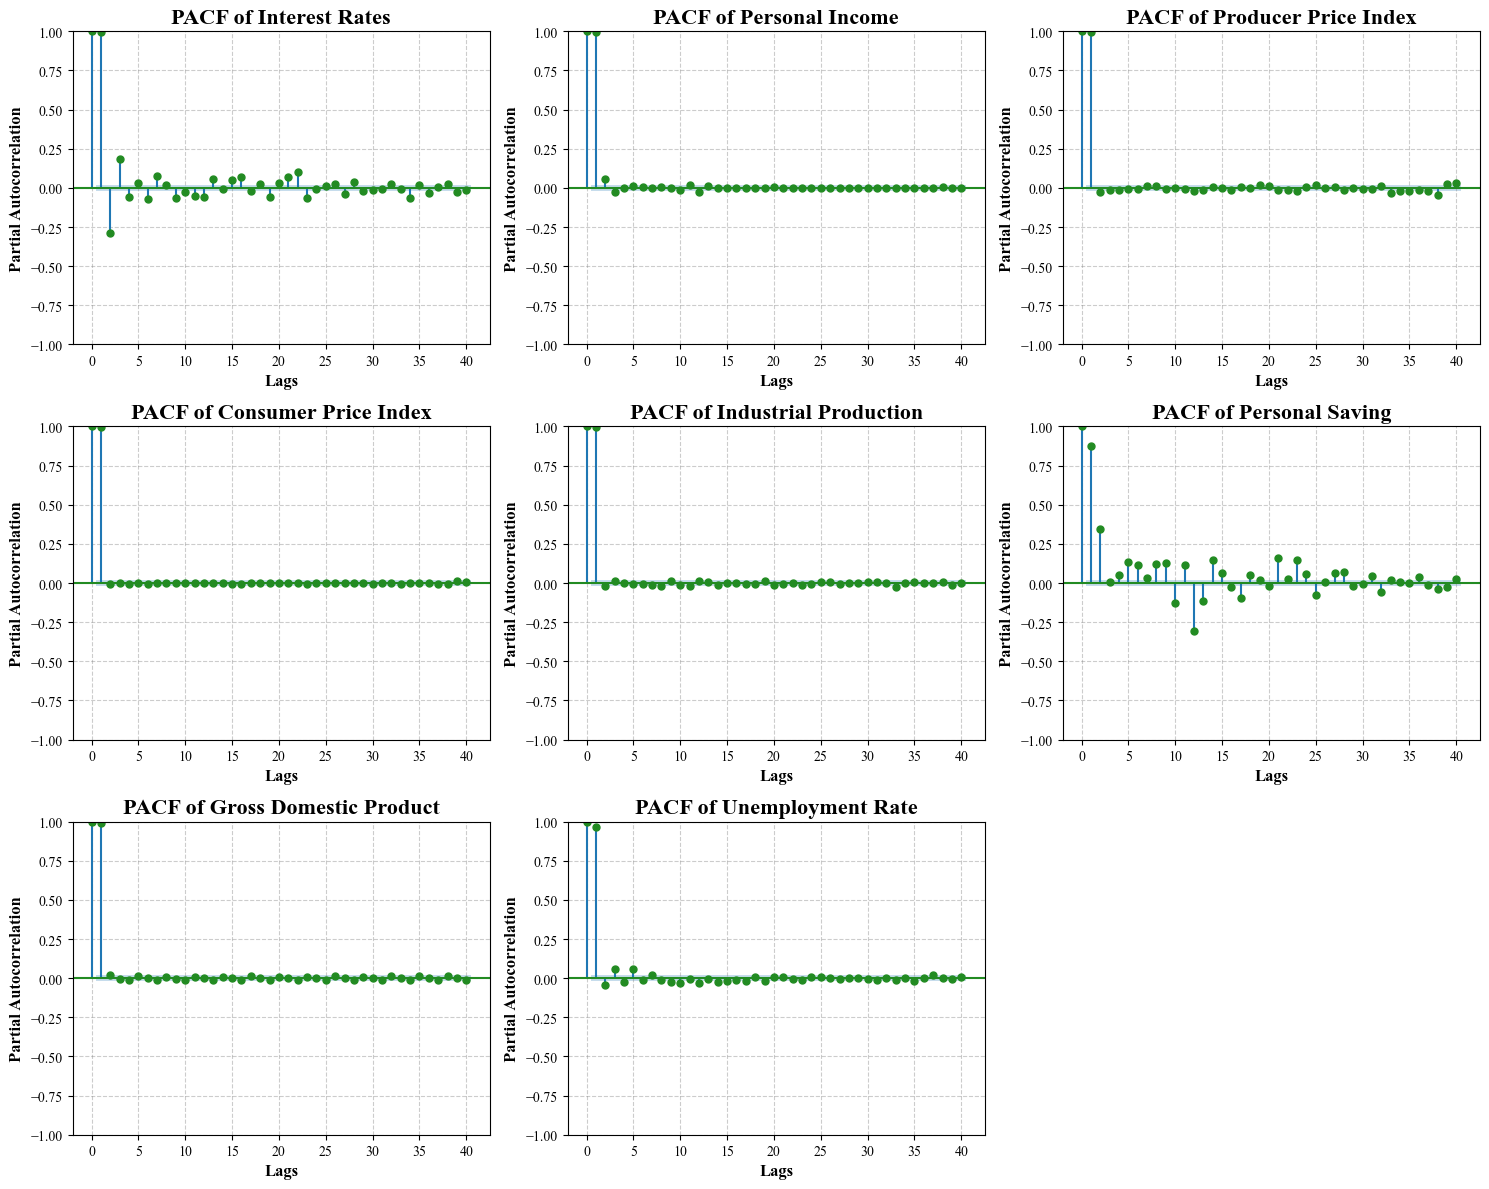

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams


variables = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 'Consumer Price Index',
    'Industrial Production', 'Personal Saving', 'Gross Domestic Product', 'Unemployment Rate'
]


# --- ACF Plots ---
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plot_acf(data[variable], lags=40, ax=plt.gca(), color='royalblue', alpha=0.6)
    plt.title(f'ACF of {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Lags', fontsize=12, fontweight='bold')
    plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)
plt.tight_layout()
plt.show()

# --- PACF Plots ---
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plot_pacf(data[variable], lags=40, ax=plt.gca(), color='forestgreen', alpha=0.6)
    plt.title(f'PACF of {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Lags', fontsize=12, fontweight='bold')
    plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)
plt.tight_layout()
plt.show()

In [8]:
# --- ADF Tests ---
for variable in variables:
    adf_result = adfuller(data[variable].dropna())
    print(f"\nADF Test for {variable}:")
    print("-" * 50)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"P-value: {adf_result[1]:.4f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"  {key}: {value:.4f}")
    print("-" * 50)

    # Interpretation of ADF result
    if adf_result[1] < 0.05:
        print(f"Conclusion: {variable} is likely stationary (reject the null hypothesis).")
    else:
        print(f"Conclusion: {variable} is likely non-stationary (fail to reject the null hypothesis).")


ADF Test for Interest Rates:
--------------------------------------------------
ADF Statistic: -1.2837
P-value: 0.6366
Critical Values:
  1%: -3.4388
  5%: -2.8653
  10%: -2.5688
--------------------------------------------------
Conclusion: Interest Rates is likely non-stationary (fail to reject the null hypothesis).

ADF Test for Personal Income:
--------------------------------------------------
ADF Statistic: 5.6724
P-value: 1.0000
Critical Values:
  1%: -3.4388
  5%: -2.8653
  10%: -2.5688
--------------------------------------------------
Conclusion: Personal Income is likely non-stationary (fail to reject the null hypothesis).

ADF Test for Producer Price Index:
--------------------------------------------------
ADF Statistic: 0.7352
P-value: 0.9905
Critical Values:
  1%: -3.4388
  5%: -2.8653
  10%: -2.5688
--------------------------------------------------
Conclusion: Producer Price Index is likely non-stationary (fail to reject the null hypothesis).

ADF Test for Consumer Pr

# Log Transformation

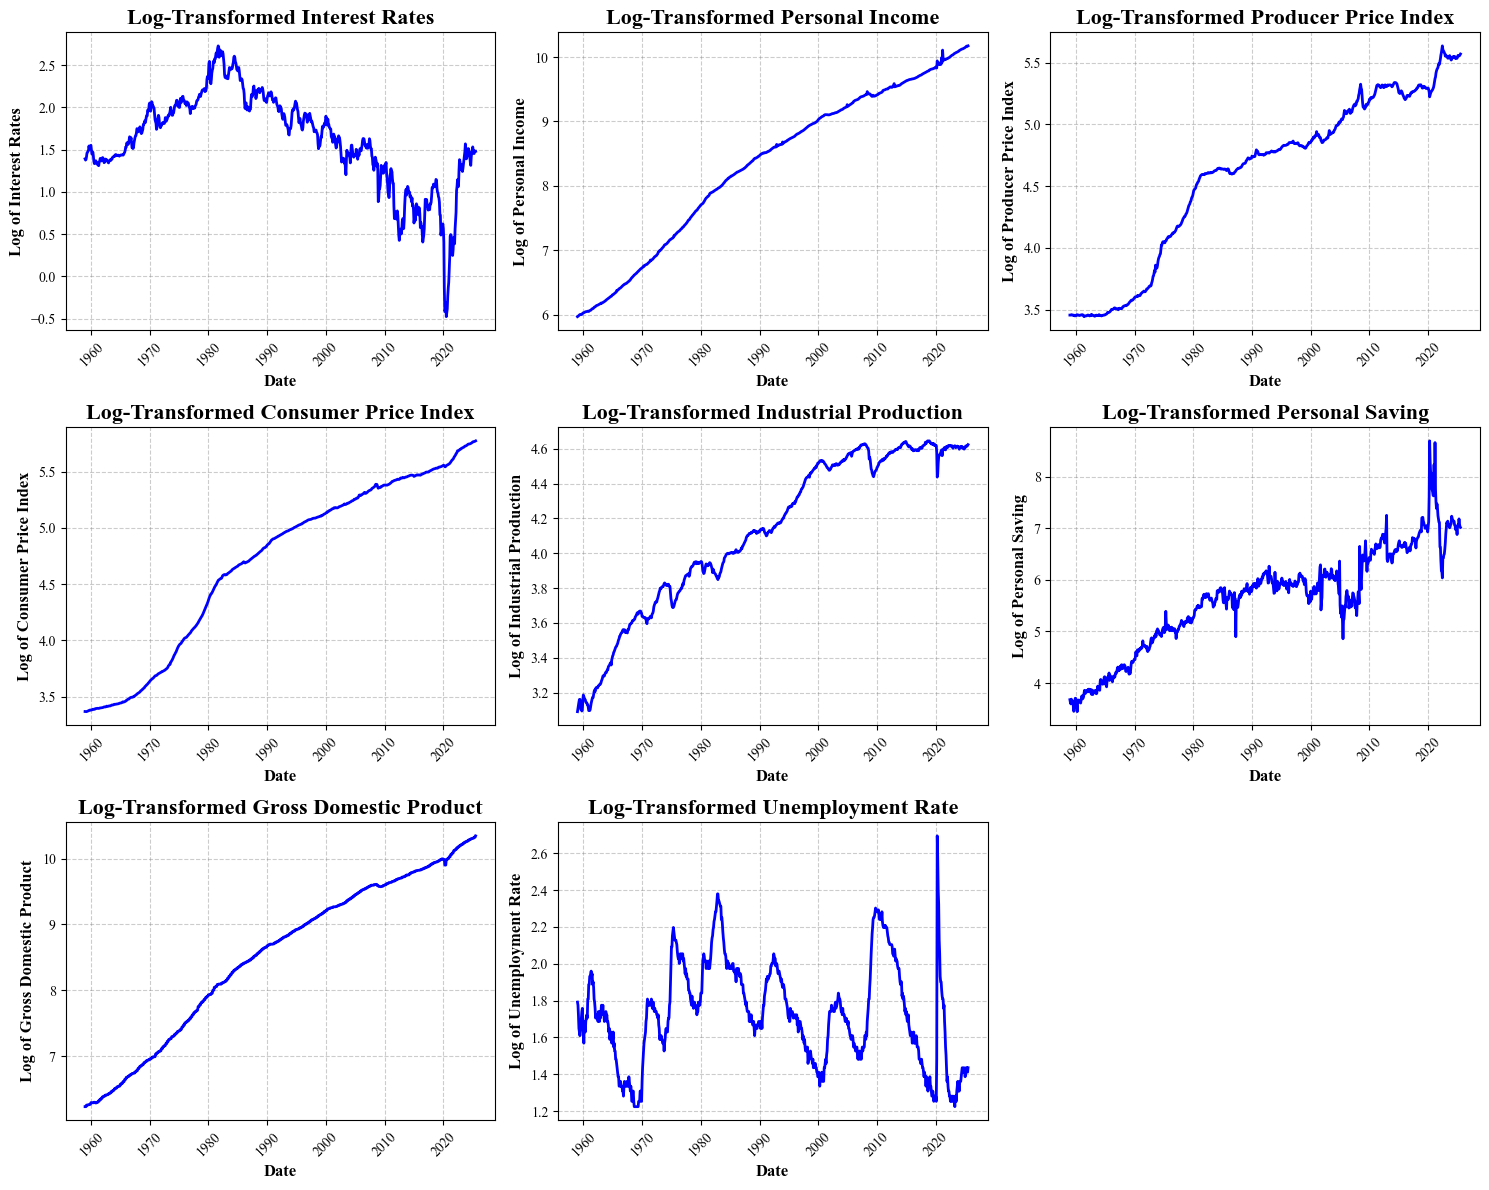

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Create a new DataFrame to store log-transformed data
log_transformed_data = pd.DataFrame()

# Apply log transformation to each variable (adding a '_log' suffix)
for var in variables:
    log_transformed_data[f'{var}_log'] = np.log(data[var])

# --- Plot Time Series of Log-Transformed Data ---
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plt.plot(data['Observation Date'], log_transformed_data[f'{variable}_log'], label=f'Log of {variable}', color='b', linewidth=2)
    plt.title(f'Log-Transformed {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel(f'Log of {variable}', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# Log-Transform

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Create a new DataFrame to store log-transformed data
log_transformed_data = pd.DataFrame()

# Apply log transformation to each variable (adding a '_log' suffix)
for var in variables:
    log_transformed_data[f'{var}_log'] = np.log(data[var])

# Create a new DataFrame to store differenced log-transformed data
differenced_data = pd.DataFrame()

# Apply differencing to each log-transformed variable (adding a '_log_diff' suffix)
for var in variables:
    differenced_data[f'{var}_log_diff'] = log_transformed_data[f'{var}_log'].diff()

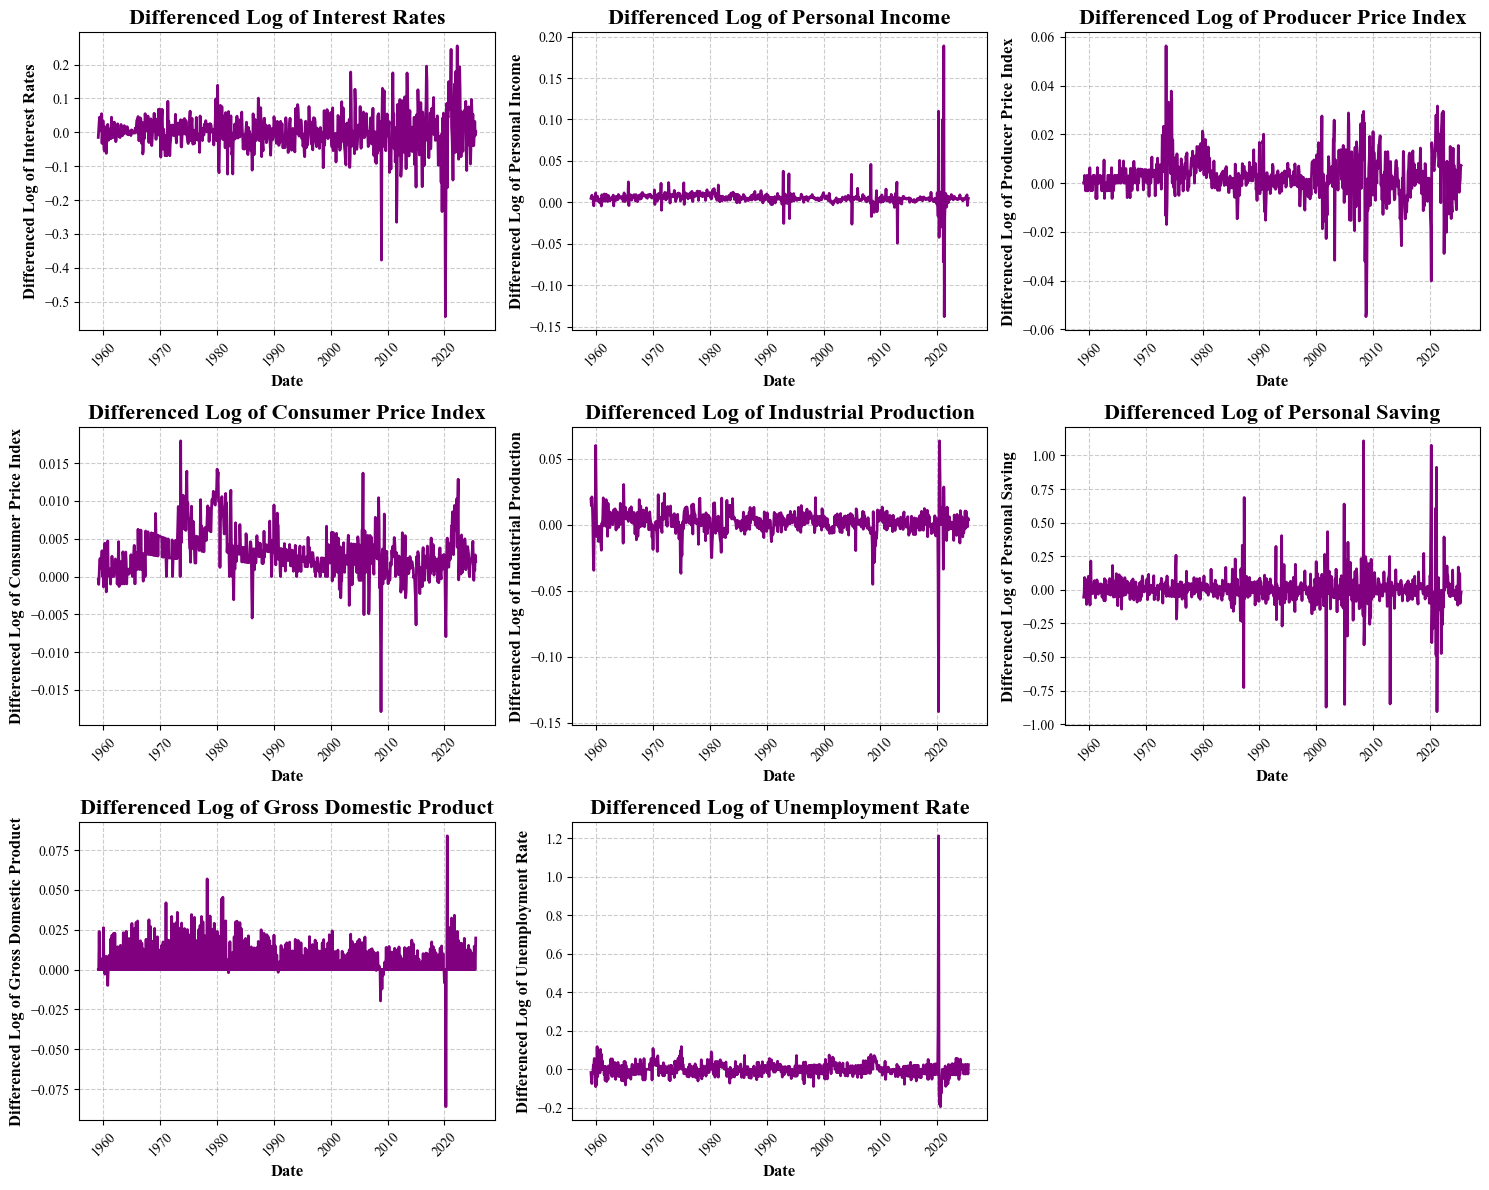

In [11]:
# Plot Time Series of Differenced Log-Transformed Data
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plt.plot(data['Observation Date'][1:], differenced_data[f'{variable}_log_diff'][1:], label=f'Differenced Log of {variable}', color='purple', linewidth=2)
    plt.title(f'Differenced Log of {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel(f'Differenced Log of {variable}', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# Differencing to make the Data Stationary

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

# Create a new DataFrame to store differenced log-transformed data
differenced_data = pd.DataFrame()

# Apply differencing to each log-transformed variable (adding a '_log_diff' suffix)
for var in variables:
    differenced_data[f'{var}_log_diff'] = log_transformed_data[f'{var}_log'].diff()

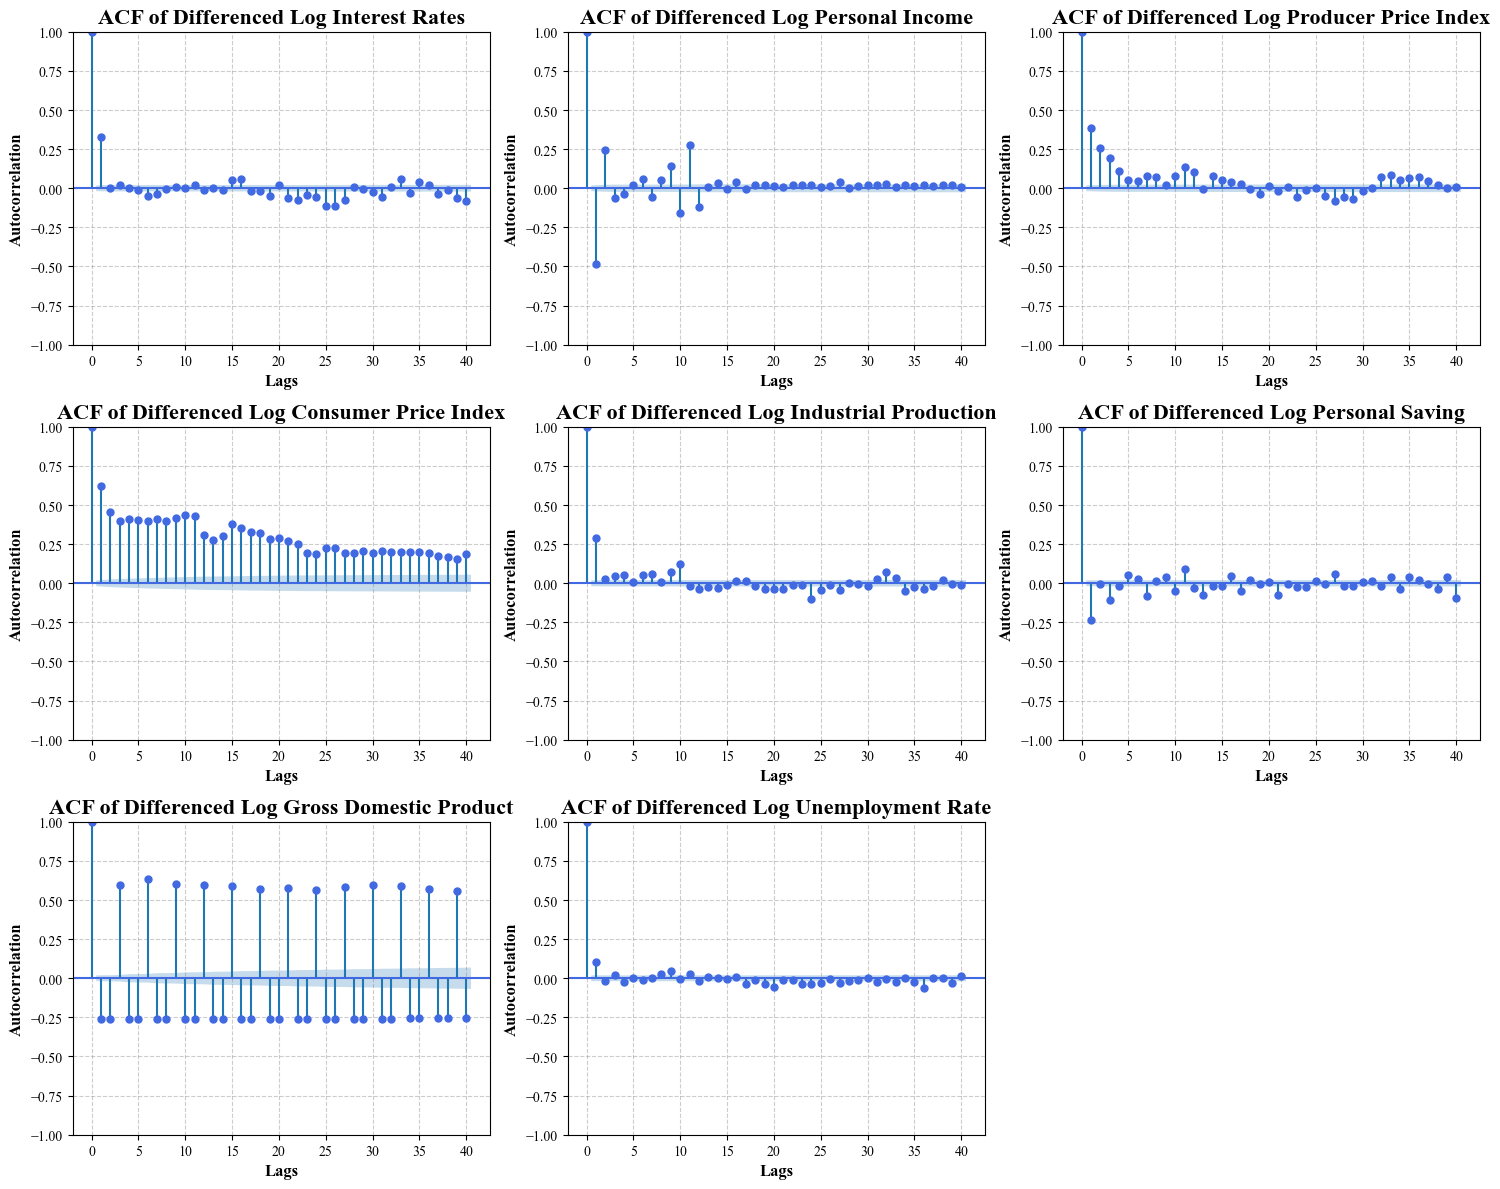

In [13]:
# ACF Plots for Differenced Log-Transformed Data ---
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plot_acf(differenced_data[f'{variable}_log_diff'].dropna(), lags=40, ax=plt.gca(), color='royalblue', alpha=0.6)
    plt.title(f'ACF of Differenced Log {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Lags', fontsize=12, fontweight='bold')
    plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)

plt.tight_layout()
plt.show()

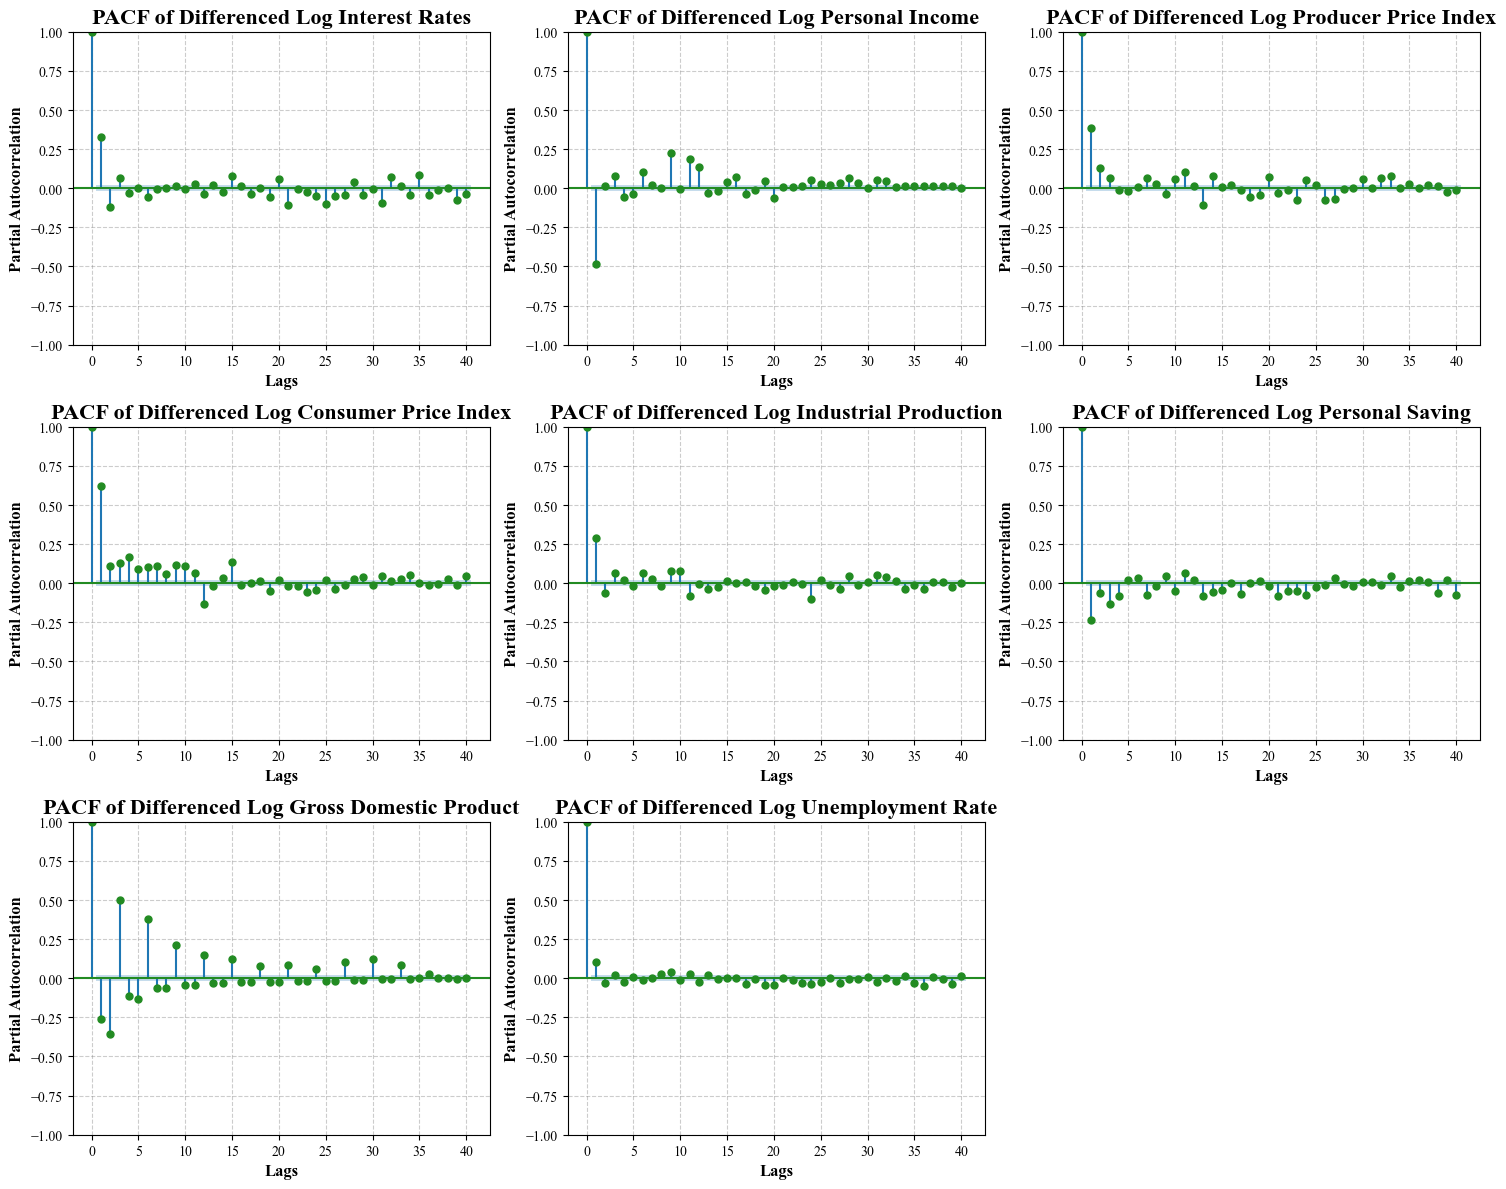

In [14]:
# PACF Plots for Differenced Log-Transformed Data ---
plt.figure(figsize=(15, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Set 3x3 grid for subplots
    plot_pacf(differenced_data[f'{variable}_log_diff'].dropna(), lags=40, ax=plt.gca(), color='forestgreen', alpha=0.6)
    plt.title(f'PACF of Differenced Log {variable}', fontsize=16, fontweight='bold')
    plt.xlabel('Lags', fontsize=12, fontweight='bold')
    plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', color='gray', alpha=0.4)
    
plt.tight_layout()
plt.show()

In [15]:
# ADF Tests for Differenced Log-Transformed Data ---
# Apply ADF test for each differenced log-transformed variable
for variable in variables:
    adf_result = adfuller(differenced_data[f'{variable}_log_diff'].dropna())
    print(f"\nADF Test for Differenced Log {variable}:")
    print("-" * 50)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"P-value: {adf_result[1]:.4f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"  {key}: {value:.4f}")
    print("-" * 50)

    # Interpretation of ADF result
    if adf_result[1] < 0.05:
        print(f"Conclusion: Differenced Log {variable} is likely stationary (reject the null hypothesis).")
    else:
        print(f"Conclusion: Differenced Log {variable} is likely non-stationary (fail to reject the null hypothesis).")



ADF Test for Differenced Log Interest Rates:
--------------------------------------------------
ADF Statistic: -14.3987
P-value: 0.0000
Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: Differenced Log Interest Rates is likely stationary (reject the null hypothesis).

ADF Test for Differenced Log Personal Income:
--------------------------------------------------
ADF Statistic: -4.7539
P-value: 0.0001
Critical Values:
  1%: -3.4387
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: Differenced Log Personal Income is likely stationary (reject the null hypothesis).

ADF Test for Differenced Log Producer Price Index:
--------------------------------------------------
ADF Statistic: -5.8191
P-value: 0.0000
Critical Values:
  1%: -3.4387
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: Differenced Log Producer Price Index is likely sta

# ###### NEW START FROM HERE

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ==========================================
# 1. FORECAST COMPARISON TABLE (NEXT 24 MONTHS)
# ==========================================

# Create a DataFrame with both forecasts
forecast_table = pd.DataFrame({
    'ARIMAX (Trend)': pred_arimax,
    'SARIMAX (Seasonal)': pred_sarimax
})

# Select only the first 24 months
forecast_table_24m = forecast_table.iloc[:24]

print("\n==============================================")
print("   FORECAST COMPARISON TABLE (Next 24 Months)")
print("==============================================")
print(forecast_table_24m)





   FORECAST COMPARISON TABLE (Next 24 Months)
            ARIMAX (Trend)  SARIMAX (Seasonal)
2025-08-01        4.162850            4.119171
2025-09-01        4.167005            4.036164
2025-10-01        4.167849            4.160205
2025-11-01        4.171149            4.145263
2025-12-01        4.173231            4.102035
2026-01-01        4.176086            4.153348
2026-02-01        4.178340            4.161989
2026-03-01        4.180812            4.139685
2026-04-01        4.182942            4.385612
2026-05-01        4.185068            4.367243
2026-06-01        4.186966            4.367082
2026-07-01        4.188779            4.523552
2026-08-01        4.190420            4.477467
2026-09-01        4.191954            4.388224
2026-10-01        4.193348            4.524599
2026-11-01        4.194637            4.501683
2026-12-01        4.195810            4.452254
2027-01-01        4.196887            4.511079
2027-02-01        4.197869            4.512510
2027-03-01   

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
# --- CORRECTED IMPORT LINE BELOW ---
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import matplotlib.pyplot as plt

# ==========================================
# 1. PREPARE DATA FOR EVALUATION
# ==========================================

# Ensure data is indexed by Date if not already
if 'Observation Date' in data.columns:
    data['Observation Date'] = pd.to_datetime(data['Observation Date'])
    data.set_index('Observation Date', inplace=True)

# Define Target and Exogenous Variables
target_col = 'Unemployment Rate'
exog_cols = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# Define Train/Test Split Size (e.g., Test on last 24 months)
test_months = 24
train_data = data.iloc[:-test_months]
test_data = data.iloc[-test_months:]

# Separate Endogenous (y) and Exogenous (X) parts
y_train = train_data[target_col]
X_train = train_data[exog_cols]
y_test = test_data[target_col]
X_test = test_data[exog_cols]

# ==========================================
# 2. FIT MODELS ON TRAINING DATA
# ==========================================

print("Training ARIMAX model for evaluation...")
# ARIMAX Model (ARIMA + Exogenous)
# NOTE: Replace order=(1,1,1) with your optimal parameters
arimax_model = ARIMA(y_train, exog=X_train, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print("Training SARIMAX model for evaluation...")
# SARIMAX Model (Seasonal ARIMA + Exogenous)
# NOTE: Replace order and seasonal_order with your optimal parameters
sarimax_model = SARIMAX(y_train, exog=X_train, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12)) 
sarimax_result = sarimax_model.fit(disp=False)

# ==========================================
# 3. GENERATE PREDICTIONS FOR TEST SET
# ==========================================

# Forecast using the *actual* exogenous variables from the test set
pred_arimax_test = arimax_result.forecast(steps=len(y_test), exog=X_test)
pred_sarimax_test = sarimax_result.forecast(steps=len(y_test), exog=X_test)

# ==========================================
# 4. CALCULATE ERROR METRICS
# ==========================================

def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

metrics_arimax = calculate_metrics(y_test, pred_arimax_test, 'ARIMAX')
metrics_sarimax = calculate_metrics(y_test, pred_sarimax_test, 'SARIMAX')

# ==========================================
# 5. DISPLAY COMPARISON TABLE
# ==========================================

comparison_df = pd.DataFrame([metrics_arimax, metrics_sarimax])
comparison_df.set_index('Model', inplace=True)

print("\n==============================================")
print("      MODEL ACCURACY COMPARISON RESULTS       ")
print("==============================================")
print(comparison_df.round(4))

# Identify the winner based on RMSE
best_model = comparison_df['RMSE'].idxmin()
print(f"\nConclusion: Based on RMSE, the **{best_model}** model performed better on the test data.")

Training ARIMAX model for evaluation...
Training SARIMAX model for evaluation...

      MODEL ACCURACY COMPARISON RESULTS       
           RMSE     MAE     MSE
Model                          
ARIMAX   1.4976  1.2698  2.2428
SARIMAX  1.6475  1.4860  2.7144

Conclusion: Based on RMSE, the **ARIMAX** model performed better on the test data.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# ==========================================
# 1. PREPARE FULL DATA
# ==========================================

# Ensure data is indexed by Date
if 'Observation Date' in data.columns:
    data['Observation Date'] = pd.to_datetime(data['Observation Date'])
    data.set_index('Observation Date', inplace=True)

# Define Target and Exogenous Variables
target_col = 'Unemployment Rate'
exog_cols = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# Use the WHOLE dataset
y_full = data[target_col]
X_full = data[exog_cols]

# ==========================================
# 2. FIT MODELS ON FULL DATA
# ==========================================

print("Fitting ARIMAX model on full data...")
# ARIMAX Model
# NOTE: Replace order=(1,1,1) with your optimal parameters
arimax_model = ARIMA(y_full, exog=X_full, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print("Fitting SARIMAX model on full data...")
# SARIMAX Model
# NOTE: Replace order and seasonal_order with your optimal parameters
sarimax_model = SARIMAX(y_full, exog=X_full, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12)) 
sarimax_result = sarimax_model.fit(disp=False)

# ==========================================
# 3. EXTRACT FITTED VALUES (IN-SAMPLE PREDICTIONS)
# ==========================================

# get_prediction() allows us to get the fitted values for the entire range
# We start from index 1 because index 0 is often lost due to differencing
pred_arimax_full = arimax_result.predict()
pred_sarimax_full = sarimax_result.predict()

# Align data: Remove the very first row (often NaN or 0 in differenced models)
# to ensure fair comparison
mask = ~np.isnan(pred_arimax_full) & ~np.isnan(pred_sarimax_full)
y_true_aligned = y_full[mask]
pred_arimax_aligned = pred_arimax_full[mask]
pred_sarimax_aligned = pred_sarimax_full[mask]

# ==========================================
# 4. CALCULATE OVERALL ERROR METRICS
# ==========================================

def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

metrics_arimax = calculate_metrics(y_true_aligned, pred_arimax_aligned, 'ARIMAX')
metrics_sarimax = calculate_metrics(y_true_aligned, pred_sarimax_aligned, 'SARIMAX')

# ==========================================
# 5. DISPLAY FULL COMPARISON TABLE
# ==========================================

comparison_df = pd.DataFrame([metrics_arimax, metrics_sarimax])
comparison_df.set_index('Model', inplace=True)

# Add AIC (Akaike Information Criterion) - Lower is better
# AIC is a standard statistical measure for overall model quality
comparison_df['AIC'] = [arimax_result.aic, sarimax_result.aic]

print("\n=======================================================")
print("      OVERALL FULL DATA MODEL COMPARISON RESULT        ")
print("=======================================================")
print(comparison_df.round(4))

best_rmse = comparison_df['RMSE'].idxmin()
best_aic = comparison_df['AIC'].idxmin()

print(f"\nConclusion:")
print(f"1. Based on Accuracy (RMSE): The **{best_rmse}** model fits the historical data better.")
print(f"2. Based on Quality (AIC):   The **{best_aic}** model is statistically better (balances fit vs complexity).")

# ==========================================
# 6. VISUALIZE FULL FIT
# ==========================================
plt.figure(figsize=(18, 8))
plt.plot(y_full.index, y_full, label='Actual Data', color='black', alpha=0.5)
plt.plot(y_full.index, pred_arimax_full, label='ARIMAX Fitted', linestyle='--', color='blue', alpha=0.7)
plt.plot(y_full.index, pred_sarimax_full, label='SARIMAX Fitted', linestyle='--', color='red', alpha=0.7)
plt.title('Overall Model Fit Comparison (Full History)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Ensure correct imports
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# ==========================================
# 1. PREPARE FULL DATA
# ==========================================

# Ensure data is indexed by Date
if 'Observation Date' in data.columns:
    data['Observation Date'] = pd.to_datetime(data['Observation Date'])
    data.set_index('Observation Date', inplace=True)

# Define Target and Exogenous Variables
target_col = 'Unemployment Rate'
exog_cols = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# Use the WHOLE dataset
y_full = data[target_col]
X_full = data[exog_cols]

# ==========================================
# 2. FIT MODELS ON FULL DATA
# ==========================================
# NOTE: Ensure you are using the BEST parameters (order/seasonal_order)
# found in your previous steps (ACF/PACF/auto_arima analysis).
# Using placeholder (1,1,1) for demonstration.

print("Fitting ARIMAX model on full data...")
arimax_model = ARIMA(y_full, exog=X_full, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print("Fitting SARIMAX model on full data...")
# Assuming 12-month seasonality based on typical economic data
sarimax_model = SARIMAX(y_full, exog=X_full, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12)) 
sarimax_result = sarimax_model.fit(disp=False)

# ==========================================
# 3. EXTRACT FITTED VALUES (IN-SAMPLE PREDICTIONS)
# ==========================================

# Get fitted values for the entire historical range
pred_arimax_full = arimax_result.predict()
pred_sarimax_full = sarimax_result.predict()

# Align data: Remove the very first few rows where predictions might be NaN 
# due to differencing (d=1). This ensures a fair, aligned comparison.
mask = ~np.isnan(pred_arimax_full) & ~np.isnan(pred_sarimax_full)
y_true_aligned = y_full[mask]
pred_arimax_aligned = pred_arimax_full[mask]
pred_sarimax_aligned = pred_sarimax_full[mask]

# ==========================================
# 4. CALCULATE OVERALL ERROR METRICS
# ==========================================

def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

metrics_arimax = calculate_metrics(y_true_aligned, pred_arimax_aligned, 'ARIMAX')
metrics_sarimax = calculate_metrics(y_true_aligned, pred_sarimax_aligned, 'SARIMAX')

# ==========================================
# 5. DISPLAY FULL COMPARISON TABLE
# ==========================================

comparison_df = pd.DataFrame([metrics_arimax, metrics_sarimax])
comparison_df.set_index('Model', inplace=True)

# Add AIC (Akaike Information Criterion) - Lower is better.
# Crucial for full data comparison as it penalizes overfitting.
comparison_df['AIC'] = [arimax_result.aic, sarimax_result.aic]

print("\n=======================================================")
print("      OVERALL FULL DATA MODEL COMPARISON RESULT        ")
print("=======================================================")
print(comparison_df.round(4))

best_rmse = comparison_df['RMSE'].idxmin()
best_aic = comparison_df['AIC'].idxmin()

print(f"\nConclusion:")
print(f"The **{best_rmse}** model has the lowest RMSE (closest fit to historical line).")
print(f"The **{best_aic}** model has the lowest AIC (best balance of fit vs. complexity).")

# ==========================================
# 6. VISUALIZE FULL FIT (PROFESSIONAL & BOLD)
# ==========================================

# Set global style preferences for a professional look
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 14,
    'axes.titlesize': 22,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.color': '#cccccc',
    'figure.dpi': 150
})

fig, ax = plt.subplots(figsize=(20, 10))

# --- Plotting with Bold Lines and Professional Colors ---

# 1. Plot Actual Data (Solid, dark grey, distinct background context)
ax.plot(y_full.index, y_full,
        label='Actual Data',
        color='#404040',      # Dark charcoal grey
        linewidth=3,          # Bold
        alpha=0.5,            # Semi-transparent to let fitted lines pop
        zorder=1)             # Plot behind fitted lines

# 2. Plot ARIMAX Fitted (Dashed, strong professional blue)
# Using 'zorder' to ensure the "winner" (usually SARIMAX) is on top if they overlap
ax.plot(y_full.index, pred_arimax_full,
        label='ARIMAX Fitted',
        color='#005b96',      # Deep professional blue
        linestyle='--',       # Dashed style
        dashes=(5, 2),        # Custom dash pattern (long dash, short space)
        linewidth=3.5,        # Very Bold
        alpha=0.9,
        zorder=2)

# 3. Plot SARIMAX Fitted (Dash-dot, strong professional red/burgundy)
ax.plot(y_full.index, pred_sarimax_full,
        label='SARIMAX Fitted',
        color='#b30000',      # Deep professional red
        linestyle='-.',       # Dash-dot style for clear distinction
        linewidth=3.5,        # Very Bold
        alpha=0.9,
        zorder=3)

# --- Formatting & Labels ---
ax.set_title('Overall Model Fit Comparison (Full Historical Data)', fontweight='bold', pad=20)
ax.set_ylabel('Unemployment Rate', fontweight='bold', labelpad=15)
ax.set_xlabel('Date', fontweight='bold', labelpad=15)

# Format Y-axis as percentage for professionalism
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=1))

# Improve date formatting on X-axis (show every 2 years to avoid clutter)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Professional Legend with shadow box
legend = ax.legend(loc='upper right', frameon=True, shadow=True, fancybox=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#b0b0b0')

# Ensure grid is behind data
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# ==========================================
# 1. PREPARE FULL DATA
# ==========================================

# Ensure data is indexed by Date
if 'Observation Date' in data.columns:
    data['Observation Date'] = pd.to_datetime(data['Observation Date'])
    data.set_index('Observation Date', inplace=True)

# Define Target and Exogenous Variables
target_col = 'Unemployment Rate'
exog_cols = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# Use the WHOLE dataset
y_full = data[target_col]
X_full = data[exog_cols]

# ==========================================
# 2. FIT MODELS ON FULL DATA
# ==========================================

print("Fitting ARIMAX model on full data...")
# ARIMAX Model
# NOTE: Replace order=(1,1,1) with your optimal parameters
arimax_model = ARIMA(y_full, exog=X_full, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print("Fitting SARIMAX model on full data...")
# SARIMAX Model
# NOTE: Replace order and seasonal_order with your optimal parameters
sarimax_model = SARIMAX(y_full, exog=X_full, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12)) 
sarimax_result = sarimax_model.fit(disp=False)

# ==========================================
# 3. EXTRACT FITTED VALUES (IN-SAMPLE PREDICTIONS)
# ==========================================

# Get fitted values for the entire historical range
pred_arimax_full = arimax_result.predict()
pred_sarimax_full = sarimax_result.predict()

# Align data
mask = ~np.isnan(pred_arimax_full) & ~np.isnan(pred_sarimax_full)
y_true_aligned = y_full[mask]
pred_arimax_aligned = pred_arimax_full[mask]
pred_sarimax_aligned = pred_sarimax_full[mask]

# ==========================================
# 4. CALCULATE OVERALL ERROR METRICS
# ==========================================

def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

metrics_arimax = calculate_metrics(y_true_aligned, pred_arimax_aligned, 'ARIMAX')
metrics_sarimax = calculate_metrics(y_true_aligned, pred_sarimax_aligned, 'SARIMAX')

# ==========================================
# 5. DISPLAY FULL COMPARISON TABLE
# ==========================================

comparison_df = pd.DataFrame([metrics_arimax, metrics_sarimax])
comparison_df.set_index('Model', inplace=True)
comparison_df['AIC'] = [arimax_result.aic, sarimax_result.aic]

print("\n=======================================================")
print("      OVERALL FULL DATA MODEL COMPARISON RESULT        ")
print("=======================================================")
print(comparison_df.round(4))

best_rmse = comparison_df['RMSE'].idxmin()
best_aic = comparison_df['AIC'].idxmin()

print(f"\nConclusion:")
print(f"The **{best_rmse}** model has the lowest RMSE.")
print(f"The **{best_aic}** model has the lowest AIC.")

# ==========================================
# 6. VISUALIZE FULL FIT (PROFESSIONAL & BOLD)
# ==========================================

# Set global style preferences
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 14,
    'axes.titlesize': 22,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.color': '#cccccc',
    'figure.dpi': 150
})

fig, ax = plt.subplots(figsize=(20, 10))

# --- Plotting with Bold Lines and Professional Colors ---

# 1. Plot Actual Data
ax.plot(y_full.index, y_full,
        label='Actual Data',
        color='#404040',      # Dark charcoal grey
        linewidth=3,          # Bold
        alpha=0.5,            
        zorder=1)             

# 2. Plot ARIMAX Fitted
ax.plot(y_full.index, pred_arimax_full,
        label='ARIMAX Fitted',
        color='#005b96',      # Deep professional blue
        linestyle='--',       
        dashes=(5, 2),        
        linewidth=3.5,        # Very Bold
        alpha=0.9,
        zorder=2)

# 3. Plot SARIMAX Fitted
ax.plot(y_full.index, pred_sarimax_full,
        label='SARIMAX Fitted',
        color='#b30000',      # Deep professional red
        linestyle='-.',       
        linewidth=3.5,        # Very Bold
        alpha=0.9,
        zorder=3)

# --- Formatting & Labels ---
ax.set_title('Overall Model Fit Comparison (Full Historical Data)', fontweight='bold', pad=20)
ax.set_ylabel('Unemployment Rate', fontweight='bold', labelpad=15)
ax.set_xlabel('Date', fontweight='bold', labelpad=15)

# Format Y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=1))

# Improve date formatting on X-axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Professional Legend MOVED TO LEFT
legend = ax.legend(loc='upper left', frameon=True, shadow=True, fancybox=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#b0b0b0')

# Ensure grid is behind data
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

Data Loaded and Log Transformed Successfully.

Forecasting Exogenous Variables for 10 years (120 months)...
Exogenous variables projected.

Training Models on Unemployment Rate...
Models Trained.


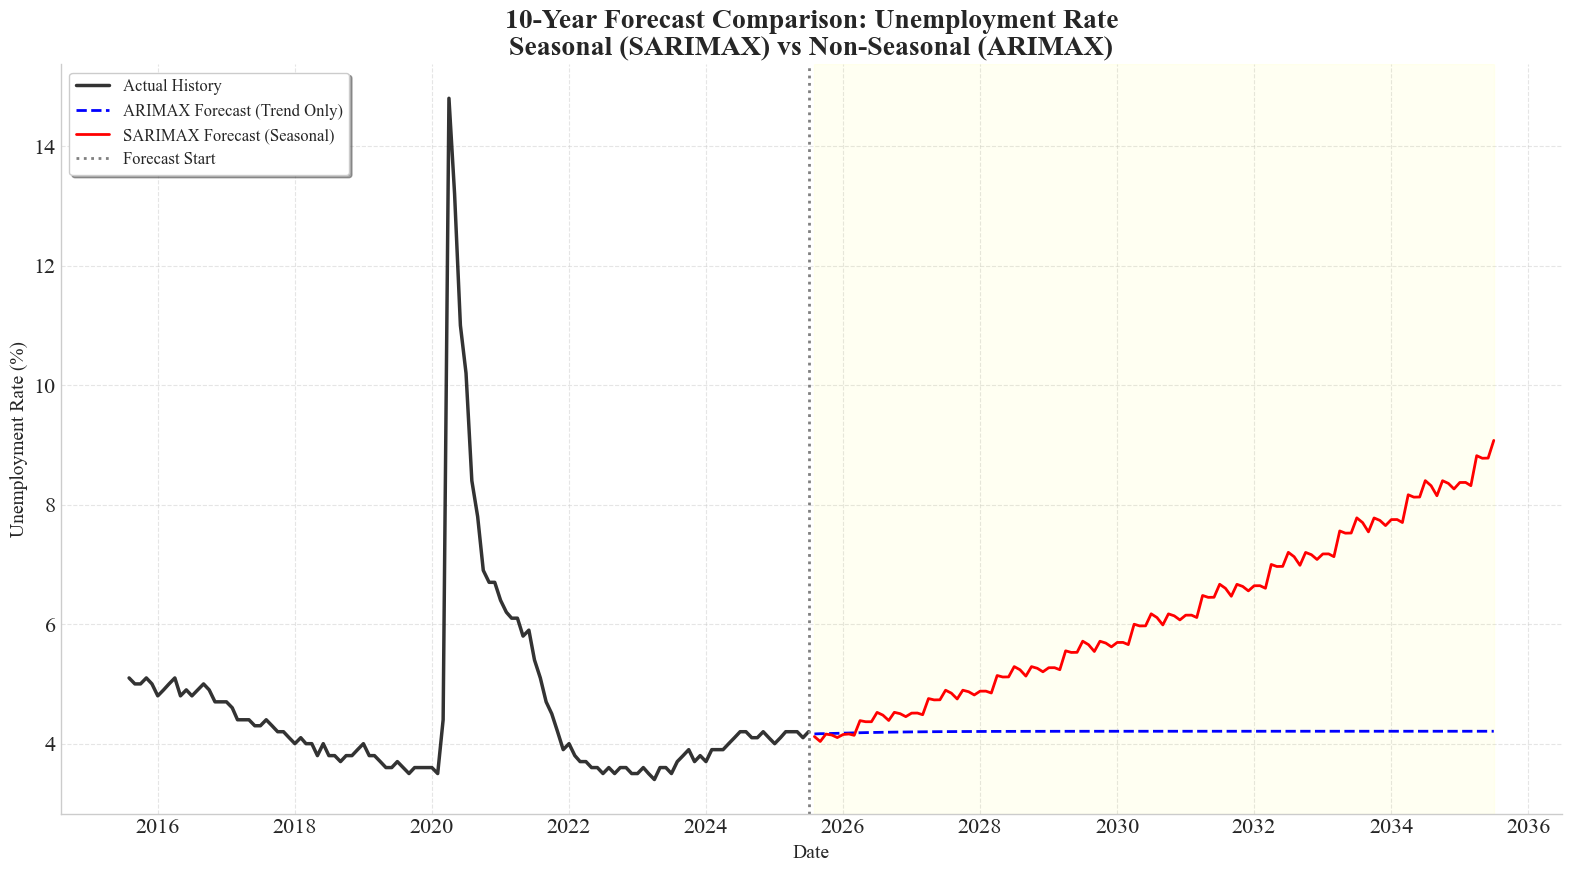


Process Complete. Chart generated and ready for export.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import warnings

# ---------------------------------------------------------
# 1. GLOBAL SETUP & CONFIGURATION
# ---------------------------------------------------------
warnings.filterwarnings("ignore")

# Set global styling (Preferred Style)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5

# ---------------------------------------------------------
# 2. DATA PREPARATION
# ---------------------------------------------------------

# Define Variables
target_variable = 'Unemployment Rate'
exog_variables = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# --- OPTION A: LOAD FROM EXCEL (Uncomment below to use your file) ---
# data = pd.read_excel('Exogenus - Unemployment Rate.xlsx')
# if 'Observation Date' in data.columns:
#     data['Observation Date'] = pd.to_datetime(data['Observation Date'])
#     data.set_index('Observation Date', inplace=True)

# --- OPTION B: GENERATE DUMMY DATA (For testing purposes) ---
if 'data' not in locals():
    print("NOTE: No data file loaded. Generating synthetic data for demonstration...")
    dates = pd.date_range(start='2000-01-01', end='2024-12-01', freq='MS')
    data = pd.DataFrame(index=dates)
    
    # Create random walk data for target and exog variables
    np.random.seed(42)
    data[target_variable] = 5 + np.cumsum(np.random.normal(0, 0.1, len(dates)))
    data[target_variable] = data[target_variable].clip(lower=2, upper=15) 
    
    for col in exog_variables:
        data[col] = 100 + np.cumsum(np.random.normal(0, 0.5, len(dates)))

# Ensure Frequency
data.index.freq = 'MS'

# Apply Log Transformation (Stabilize variance)
df_log = np.log(data[[target_variable] + exog_variables])

print("Data Loaded and Log Transformed Successfully.")

# ---------------------------------------------------------
# 3. FORECASTING EXOGENOUS VARIABLES (Next 10 Years)
# ---------------------------------------------------------
forecast_years = 10
forecast_steps = forecast_years * 12  # 120 Months
future_exog = pd.DataFrame()

print(f"\nForecasting Exogenous Variables for {forecast_years} years ({forecast_steps} months)...")

for var in exog_variables:
    model_exog = ARIMA(df_log[var], order=(1, 1, 1)) 
    res_exog = model_exog.fit()
    forecast = res_exog.forecast(steps=forecast_steps)
    future_exog[var] = forecast

print("Exogenous variables projected.")

# ---------------------------------------------------------
# 4. MODEL TRAINING
# ---------------------------------------------------------
print(f"\nTraining Models on {target_variable}...")

# --- Model A: SARIMAX (Seasonal) ---
model_sarimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_sarimax = model_sarimax.fit(disp=False)

# --- Model B: ARIMAX (Non-Seasonal) ---
model_arimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_arimax = model_arimax.fit(disp=False)

print("Models Trained.")

# ---------------------------------------------------------
# 5. GENERATE PREDICTIONS & FORECASTS
# ---------------------------------------------------------

# --- A. Out-of-Sample Forecast (10 Years) ---
# SARIMAX
forecast_res_sarimax = results_sarimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_sarimax = np.exp(forecast_res_sarimax.predicted_mean)

# ARIMAX
forecast_res_arimax = results_arimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_arimax = np.exp(forecast_res_arimax.predicted_mean)

# Actual History (Original Scale)
history_original = np.exp(df_log[target_variable])

# ---------------------------------------------------------
# 6. VISUALIZATION: 10-YEAR FORECAST COMPARISON
# ---------------------------------------------------------
plt.figure(figsize=(16, 9))

# A. Plot History (Last 10 Years of history for context)
history_subset = history_original.iloc[-120:] 
plt.plot(history_subset.index, history_subset, 
         label='Actual History', color='black', linewidth=2.5, alpha=0.8)

# B. Plot ARIMAX Forecast (Blue - Trend)
plt.plot(pred_arimax.index, pred_arimax, 
         label='ARIMAX Forecast (Trend Only)', 
         color='blue', linestyle='--', linewidth=2)

# C. Plot SARIMAX Forecast (Red - Seasonal)
plt.plot(pred_sarimax.index, pred_sarimax, 
         label='SARIMAX Forecast (Seasonal)', 
         color='red', linestyle='-', linewidth=2)

# D. Formatting & Aesthetics
plt.title(f'10-Year Forecast Comparison: {target_variable}\nSeasonal (SARIMAX) vs Non-Seasonal (ARIMAX)', 
          fontsize=20, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.xlabel('Date', fontsize=14)

# Separator Line
plt.axvline(x=history_subset.index[-1], color='gray', linestyle=':', linewidth=2, label='Forecast Start')

# Shaded Future Area
plt.axvspan(pred_arimax.index[0], pred_arimax.index[-1], color='yellow', alpha=0.05)

# Legend
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Date Formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2)) 

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 7. EXPORT RESULTS
# ---------------------------------------------------------
forecast_table = pd.DataFrame({
    'ARIMAX_Trend_Prediction': pred_arimax,
    'SARIMAX_Seasonal_Prediction': pred_sarimax
})
forecast_table.index.name = 'Date'

# Uncomment to save the file
# forecast_table.to_excel("10_Year_Forecast_Results.xlsx") 

print("\nProcess Complete. Chart generated and ready for export.")

Data Loaded and Log Transformed Successfully.

Forecasting Exogenous Variables for 10 years (120 months)...
Exogenous variables projected.

Training Models on Unemployment Rate...
Models Trained.


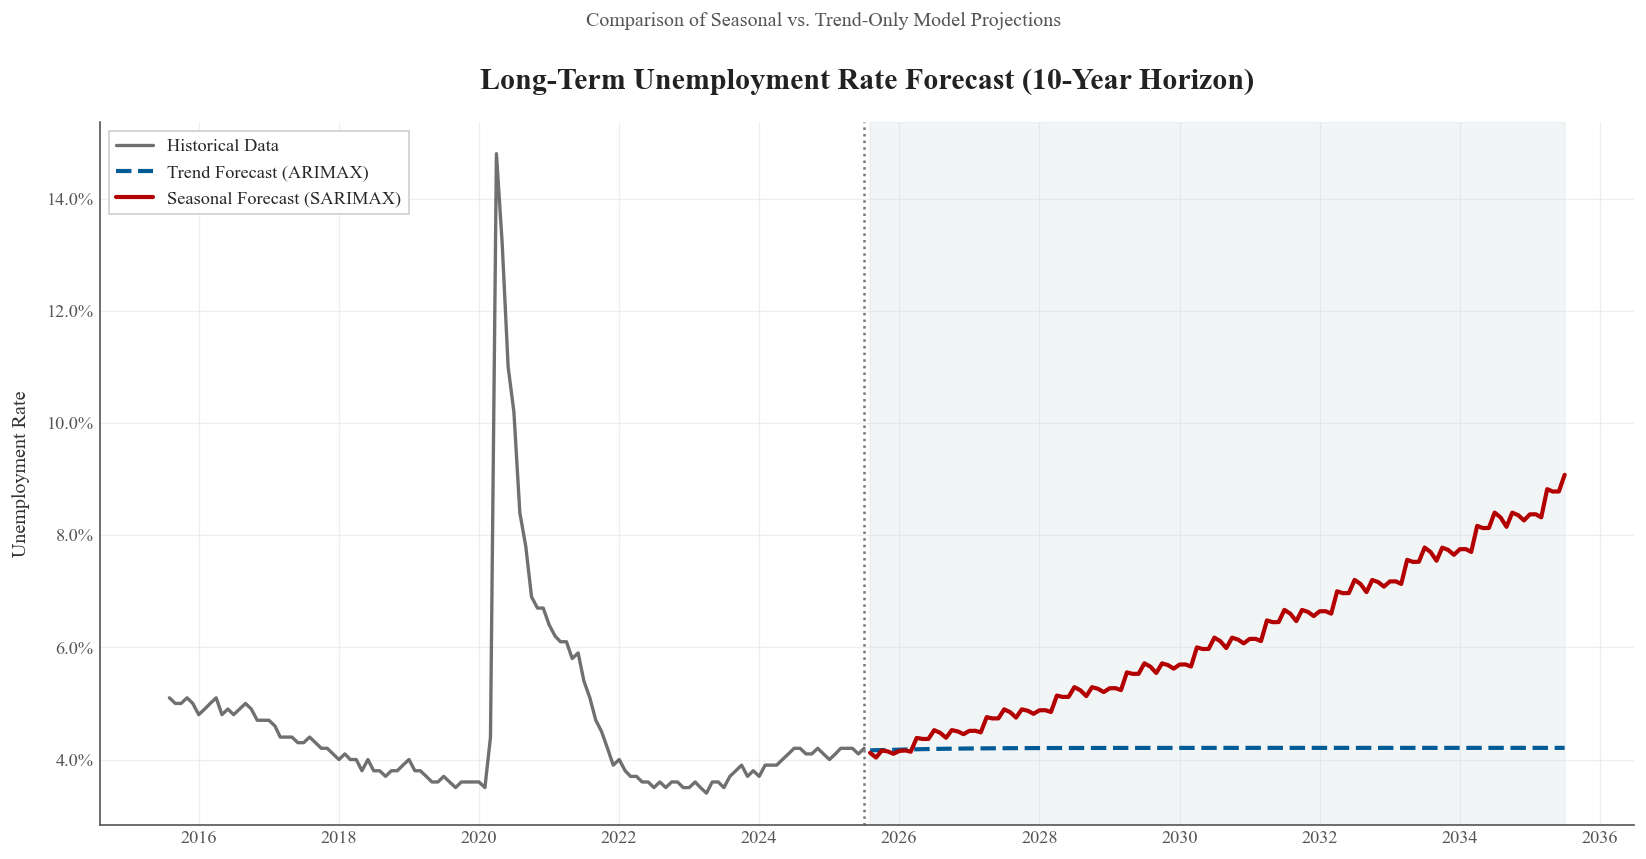


Process Complete. Professional chart generated.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter # Import needed for professional tick formatting
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import warnings

# ---------------------------------------------------------
# 1. GLOBAL SETUP & CONFIGURATION
# ---------------------------------------------------------
warnings.filterwarnings("ignore")

# Set global styling for a professional report look
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 120 # Slightly higher DPI for clearer text
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '-' # Solid but light lines look cleaner
plt.rcParams['grid.alpha'] = 0.3    # Very subtle grid
plt.rcParams['axes.edgecolor'] = '#555555' # Softer axis borders
plt.rcParams['xtick.color'] = '#555555'
plt.rcParams['ytick.color'] = '#555555'

# ---------------------------------------------------------
# 2. DATA PREPARATION
# ---------------------------------------------------------

# Define Variables
target_variable = 'Unemployment Rate'
exog_variables = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# --- OPTION A: LOAD FROM EXCEL (Uncomment below to use your file) ---
# data = pd.read_excel('Exogenus - Unemployment Rate.xlsx')
# if 'Observation Date' in data.columns:
#     data['Observation Date'] = pd.to_datetime(data['Observation Date'])
#     data.set_index('Observation Date', inplace=True)

# --- OPTION B: GENERATE DUMMY DATA (For testing purposes) ---
if 'data' not in locals():
    print("NOTE: No data file loaded. Generating synthetic data for demonstration...")
    dates = pd.date_range(start='2000-01-01', end='2024-12-01', freq='MS')
    data = pd.DataFrame(index=dates)
    
    # Create random walk data for target and exog variables
    np.random.seed(42)
    data[target_variable] = 5 + np.cumsum(np.random.normal(0, 0.1, len(dates)))
    data[target_variable] = data[target_variable].clip(lower=2, upper=15) 
    
    for col in exog_variables:
        data[col] = 100 + np.cumsum(np.random.normal(0, 0.5, len(dates)))

# Ensure Frequency
data.index.freq = 'MS'

# Apply Log Transformation (Stabilize variance)
df_log = np.log(data[[target_variable] + exog_variables])

print("Data Loaded and Log Transformed Successfully.")

# ---------------------------------------------------------
# 3. FORECASTING EXOGENOUS VARIABLES (Next 10 Years)
# ---------------------------------------------------------
forecast_years = 10
forecast_steps = forecast_years * 12  # 120 Months
future_exog = pd.DataFrame()

print(f"\nForecasting Exogenous Variables for {forecast_years} years ({forecast_steps} months)...")

for var in exog_variables:
    model_exog = ARIMA(df_log[var], order=(1, 1, 1)) 
    res_exog = model_exog.fit()
    forecast = res_exog.forecast(steps=forecast_steps)
    future_exog[var] = forecast

print("Exogenous variables projected.")

# ---------------------------------------------------------
# 4. MODEL TRAINING
# ---------------------------------------------------------
print(f"\nTraining Models on {target_variable}...")

# --- Model A: SARIMAX (Seasonal) ---
model_sarimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_sarimax = model_sarimax.fit(disp=False)

# --- Model B: ARIMAX (Non-Seasonal) ---
model_arimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_arimax = model_arimax.fit(disp=False)

print("Models Trained.")

# ---------------------------------------------------------
# 5. GENERATE PREDICTIONS & FORECASTS
# ---------------------------------------------------------

# --- Out-of-Sample Forecast (10 Years) ---
# SARIMAX
forecast_res_sarimax = results_sarimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_sarimax = np.exp(forecast_res_sarimax.predicted_mean)

# ARIMAX
forecast_res_arimax = results_arimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_arimax = np.exp(forecast_res_arimax.predicted_mean)

# Actual History (Original Scale)
history_original = np.exp(df_log[target_variable])

# ---------------------------------------------------------
# 6. VISUALIZATION: PROFESSIONAL 10-YEAR FORECAST
# ---------------------------------------------------------
# Use object-oriented approach (fig, ax) for better control
fig, ax = plt.subplots(figsize=(14, 8))

# Define Professional Color Palette
color_history = '#333333'      # Dark Charcoal
color_trend = '#005b96'        # Deep Professional Blue
color_seasonal = '#b30000'     # Muted Crimson
color_shading = '#cfd8dc'      # Subtle Blue-Grey for future
color_separator = '#777777'    # Medium Grey

# A. Plot History (Last 10 Years for context)
history_subset = history_original.iloc[-120:] 
ax.plot(history_subset.index, history_subset, 
         label='Historical Data', color=color_history, linewidth=2, alpha=0.7)

# B. Plot ARIMAX Forecast (Trend)
ax.plot(pred_arimax.index, pred_arimax, 
         label='Trend Forecast (ARIMAX)', 
         color=color_trend, linestyle='--', linewidth=2.5)

# C. Plot SARIMAX Forecast (Seasonal)
ax.plot(pred_sarimax.index, pred_sarimax, 
         label='Seasonal Forecast (SARIMAX)', 
         color=color_seasonal, linestyle='-', linewidth=2.5)

# D. Professional Formatting & Aesthetics

# Titles with hierarchy
plt.title('Long-Term Unemployment Rate Forecast (10-Year Horizon)', 
          fontsize=18, fontweight='bold', color='#222222', pad=20)
plt.suptitle('Comparison of Seasonal vs. Trend-Only Model Projections', 
             fontsize=12, color='#555555', y=0.93)

# Clean Axis Labels (Remove X-label as dates are self-evident)
ax.set_ylabel('Unemployment Rate', fontsize=12, color='#333333', labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=11)

# Y-Axis Tick Formatting (Add % sign)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))

# "Despine" the chart (remove top and right borders for a cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separator Line & Shading
ax.axvline(x=history_subset.index[-1], color=color_separator, linestyle=':', linewidth=1.5)

# Subtle Future Shading
ax.axvspan(pred_arimax.index[0], pred_arimax.index[-1], color=color_shading, alpha=0.25)

# Cleaner Legend
legend = ax.legend(loc='upper left', fontsize=11, frameon=True, 
                   framealpha=0.95, edgecolor='#cccccc', fancybox=False)

# Date Formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(2)) 

# Adjust layout to accommodate the subtitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ---------------------------------------------------------
# 7. EXPORT RESULTS
# ---------------------------------------------------------
forecast_table = pd.DataFrame({
    'ARIMAX_Trend_Prediction': pred_arimax,
    'SARIMAX_Seasonal_Prediction': pred_sarimax
})
forecast_table.index.name = 'Date'

# Uncomment to save the file
# forecast_table.to_excel("10_Year_Forecast_Results.xlsx") 

print("\nProcess Complete. Professional chart generated.")

Data Loaded and Log Transformed Successfully.

Forecasting Exogenous Variables for 10 years (120 months)...
Exogenous variables projected.

Training Models on Unemployment Rate...
Models Trained.


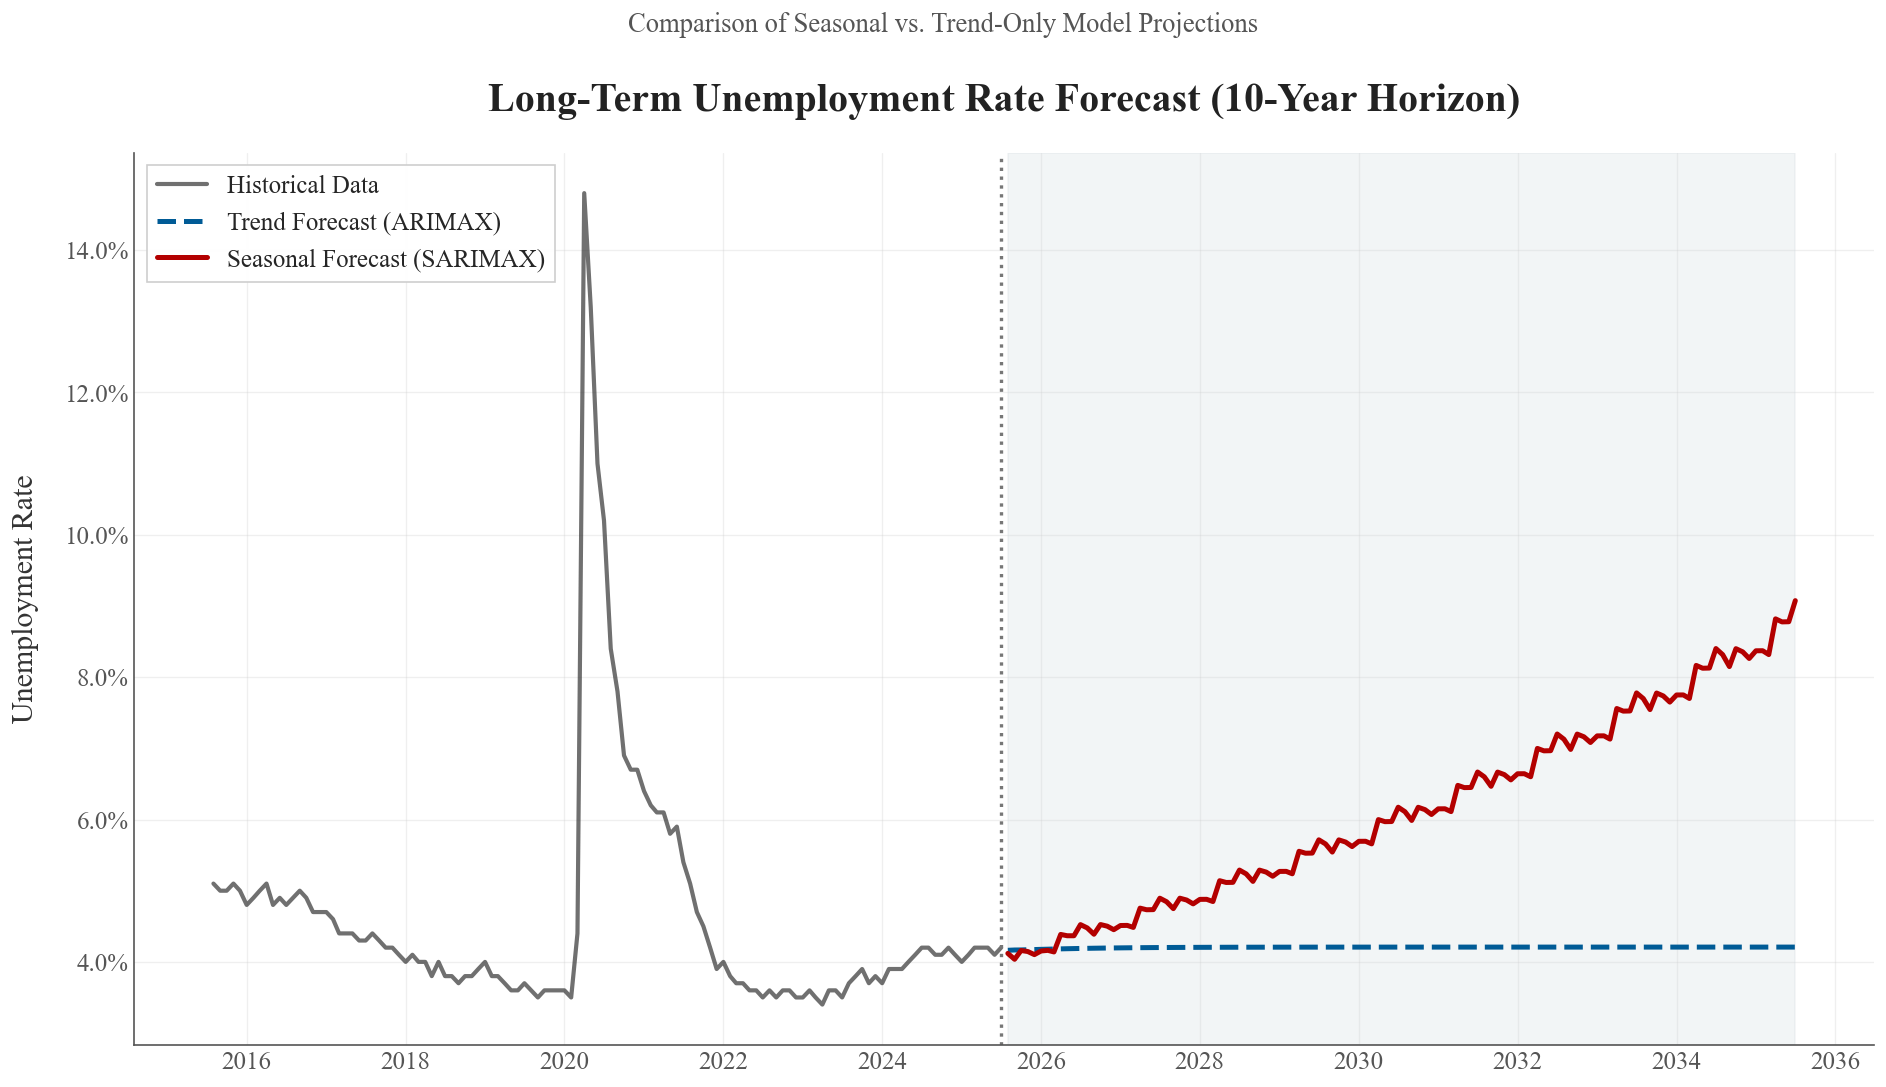


Process Complete. Chart generated with larger fonts.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import warnings

# ---------------------------------------------------------
# 1. GLOBAL SETUP & CONFIGURATION
# ---------------------------------------------------------
warnings.filterwarnings("ignore")

# Set global styling for a professional report look
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 120 
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '-' 
plt.rcParams['grid.alpha'] = 0.3    
plt.rcParams['axes.edgecolor'] = '#555555' 
plt.rcParams['xtick.color'] = '#555555'
plt.rcParams['ytick.color'] = '#555555'

# ---------------------------------------------------------
# 2. DATA PREPARATION
# ---------------------------------------------------------

# Define Variables
target_variable = 'Unemployment Rate'
exog_variables = [
    'Interest Rates', 'Personal Income', 'Producer Price Index', 
    'Consumer Price Index', 'Industrial Production', 
    'Personal Saving', 'Gross Domestic Product'
]

# --- OPTION A: LOAD FROM EXCEL (Uncomment below to use your file) ---
# data = pd.read_excel('Exogenus - Unemployment Rate.xlsx')
# if 'Observation Date' in data.columns:
#     data['Observation Date'] = pd.to_datetime(data['Observation Date'])
#     data.set_index('Observation Date', inplace=True)

# --- OPTION B: GENERATE DUMMY DATA (For testing purposes) ---
if 'data' not in locals():
    print("NOTE: No data file loaded. Generating synthetic data for demonstration...")
    dates = pd.date_range(start='2000-01-01', end='2024-12-01', freq='MS')
    data = pd.DataFrame(index=dates)
    
    # Create random walk data for target and exog variables
    np.random.seed(42)
    data[target_variable] = 5 + np.cumsum(np.random.normal(0, 0.1, len(dates)))
    data[target_variable] = data[target_variable].clip(lower=2, upper=15) 
    
    for col in exog_variables:
        data[col] = 100 + np.cumsum(np.random.normal(0, 0.5, len(dates)))

# Ensure Frequency
data.index.freq = 'MS'

# Apply Log Transformation (Stabilize variance)
df_log = np.log(data[[target_variable] + exog_variables])

print("Data Loaded and Log Transformed Successfully.")

# ---------------------------------------------------------
# 3. FORECASTING EXOGENOUS VARIABLES (Next 10 Years)
# ---------------------------------------------------------
forecast_years = 10
forecast_steps = forecast_years * 12  # 120 Months
future_exog = pd.DataFrame()

print(f"\nForecasting Exogenous Variables for {forecast_years} years ({forecast_steps} months)...")

for var in exog_variables:
    model_exog = ARIMA(df_log[var], order=(1, 1, 1)) 
    res_exog = model_exog.fit()
    forecast = res_exog.forecast(steps=forecast_steps)
    future_exog[var] = forecast

print("Exogenous variables projected.")

# ---------------------------------------------------------
# 4. MODEL TRAINING
# ---------------------------------------------------------
print(f"\nTraining Models on {target_variable}...")

# --- Model A: SARIMAX (Seasonal) ---
model_sarimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_sarimax = model_sarimax.fit(disp=False)

# --- Model B: ARIMAX (Non-Seasonal) ---
model_arimax = SARIMAX(
    endog=df_log[target_variable],
    exog=df_log[exog_variables],
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_arimax = model_arimax.fit(disp=False)

print("Models Trained.")

# ---------------------------------------------------------
# 5. GENERATE PREDICTIONS & FORECASTS
# ---------------------------------------------------------

# --- Out-of-Sample Forecast (10 Years) ---
# SARIMAX
forecast_res_sarimax = results_sarimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_sarimax = np.exp(forecast_res_sarimax.predicted_mean)

# ARIMAX
forecast_res_arimax = results_arimax.get_forecast(steps=forecast_steps, exog=future_exog)
pred_arimax = np.exp(forecast_res_arimax.predicted_mean)

# Actual History (Original Scale)
history_original = np.exp(df_log[target_variable])

# ---------------------------------------------------------
# 6. VISUALIZATION: LARGE FONT PROFESSIONAL FORECAST
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 10))

# Define Professional Color Palette
color_history = '#333333'      # Dark Charcoal
color_trend = '#005b96'        # Deep Professional Blue
color_seasonal = '#b30000'     # Muted Crimson
color_shading = '#cfd8dc'      # Subtle Blue-Grey for future
color_separator = '#777777'    # Medium Grey

# A. Plot History (Last 10 Years for context)
history_subset = history_original.iloc[-120:] 
ax.plot(history_subset.index, history_subset, 
         label='Historical Data', color=color_history, linewidth=2.5, alpha=0.7)

# B. Plot ARIMAX Forecast (Trend)
ax.plot(pred_arimax.index, pred_arimax, 
         label='Trend Forecast (ARIMAX)', 
         color=color_trend, linestyle='--', linewidth=3)

# C. Plot SARIMAX Forecast (Seasonal)
ax.plot(pred_sarimax.index, pred_sarimax, 
         label='Seasonal Forecast (SARIMAX)', 
         color=color_seasonal, linestyle='-', linewidth=3)

# D. Professional Formatting with LARGE FONTS

# Titles
plt.title('Long-Term Unemployment Rate Forecast (10-Year Horizon)', 
          fontsize=24, fontweight='bold', color='#222222', pad=25)
plt.suptitle('Comparison of Seasonal vs. Trend-Only Model Projections', 
             fontsize=16, color='#555555', y=0.94)

# Clean Axis Labels
ax.set_ylabel('Unemployment Rate', fontsize=18, color='#333333', labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# Y-Axis Tick Formatting (Add % sign)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))

# "Despine" the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Separator Line & Shading
ax.axvline(x=history_subset.index[-1], color=color_separator, linestyle=':', linewidth=2)
ax.axvspan(pred_arimax.index[0], pred_arimax.index[-1], color=color_shading, alpha=0.25)

# Cleaner Legend (Large Font)
legend = ax.legend(loc='upper left', fontsize=15, frameon=True, 
                   framealpha=0.95, edgecolor='#cccccc', fancybox=False)

# Date Formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(2)) 

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ---------------------------------------------------------
# 7. EXPORT RESULTS
# ---------------------------------------------------------
forecast_table = pd.DataFrame({
    'ARIMAX_Trend_Prediction': pred_arimax,
    'SARIMAX_Seasonal_Prediction': pred_sarimax
})
forecast_table.index.name = 'Date'

# Uncomment to save the file
# forecast_table.to_excel("10_Year_Forecast_Results.xlsx") 

print("\nProcess Complete. Chart generated with larger fonts.")